<a href="https://colab.research.google.com/github/Arrya1424/Databases-analytics-coursework/blob/main/Copy_of_Database_And_Analytics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url <- "https://raw.githubusercontent.com/your-username/your-repo/main/greenfuture_ideas_dataset.csv"
greenfuture <- read_csv(url)
head(greenfuture)

ERROR: Error in read_csv(url): could not find function "read_csv"


In [ ]:
sqldf("SELECT * FROM greenfuture LIMIT 5")

Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


# New Section

In [ ]:

new_row <- data.frame(
  "Employee ID" = 3001,
  "Office Location" = "Paris",
  "Department" = "Innovation",
  "Idea Submission Date" = as.Date("2025-05-20"),
  "Idea Title" = "Urban Greening",
  "Idea Category" = "Sustainability",
  "Number of Votes" = 12,
  "Collaboration Status" = "Yes",
  "Approval Status" = "Approved",
  "Implementation Status" = "Pending",
  "Security Concern Flag" = FALSE,
  check.names = FALSE,
  stringsAsFactors = FALSE
)

greenfuture <- rbind(greenfuture, new_row)

ERROR: Error: object 'greenfuture' not found


In [ ]:
greenfuture <- rbind(greenfuture, new_row)

In [ ]:
greenfuture[greenfuture$`Employee ID` == 3001, "Number of Votes"] <- 15


In [ ]:
greenfuture <- greenfuture[greenfuture$`Employee ID` != 3001, ]

In [ ]:
sqldf("SELECT [Idea Title], [Number of Votes] FROM greenfuture ORDER BY [Number of Votes] DESC LIMIT 5")


Idea Title,Number of Votes
<chr>,<dbl>
Idea 422,500
Idea 915,500
Idea 1020,500
Idea 1146,500
Idea 1323,500


In [ ]:
sqldf("SELECT [Office Location], COUNT(*) AS total_ideas FROM greenfuture GROUP BY [Office Location]")


Office Location,total_ideas
<chr>,<int>
Australia,244
Brazil,227
Canada,252
China,280
France,266
Germany,252
India,222
Japan,259
Mexico,240


In [ ]:
sqldf("SELECT [Department], AVG([Number of Votes]) AS avg_votes FROM greenfuture GROUP BY [Department]")


Department,avg_votes
<chr>,<dbl>
Environmental Policy,252.9259
Infrastructure,243.6892
Renewable Energy,246.6316
Research,248.5803
Technology,248.0460
Urban Development,250.7551


In [ ]:
greenfuture %>%
  filter(`Approval Status` == "Approved") %>%
  summarise(count = n())

count
<int>
1037


In [ ]:
greenfuture$`Idea Submission Date` <- as.Date(greenfuture$`Idea Submission Date`)


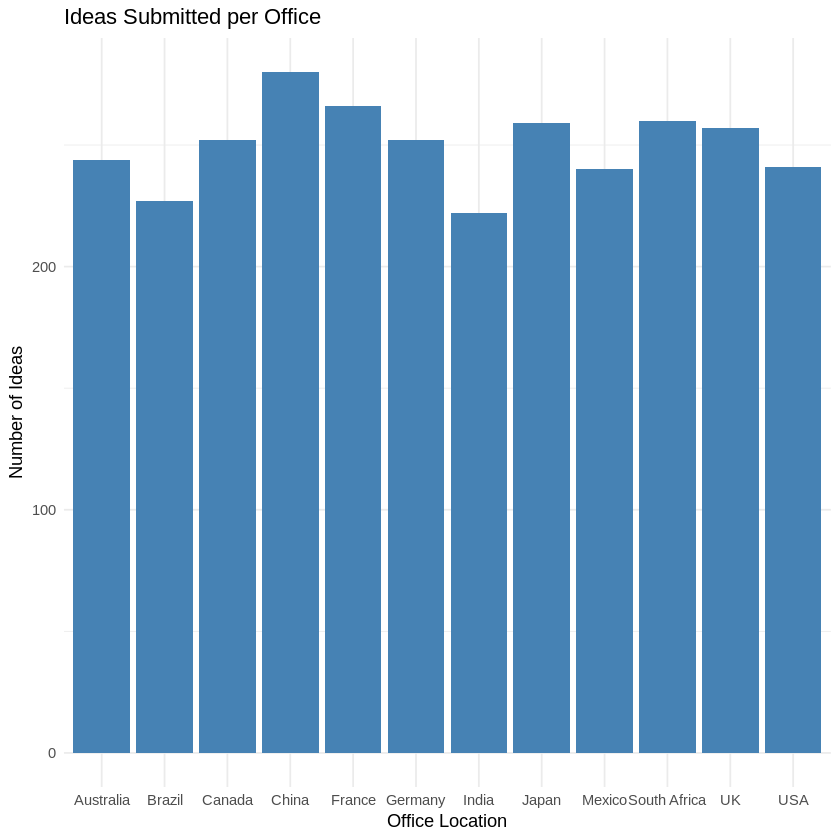

In [ ]:
ggplot(greenfuture, aes(x = `Office Location`)) +
  geom_bar(fill = "steelblue") +
  theme_minimal() +
  labs(title = "Ideas Submitted per Office",
       x = "Office Location",
       y = "Number of Ideas")

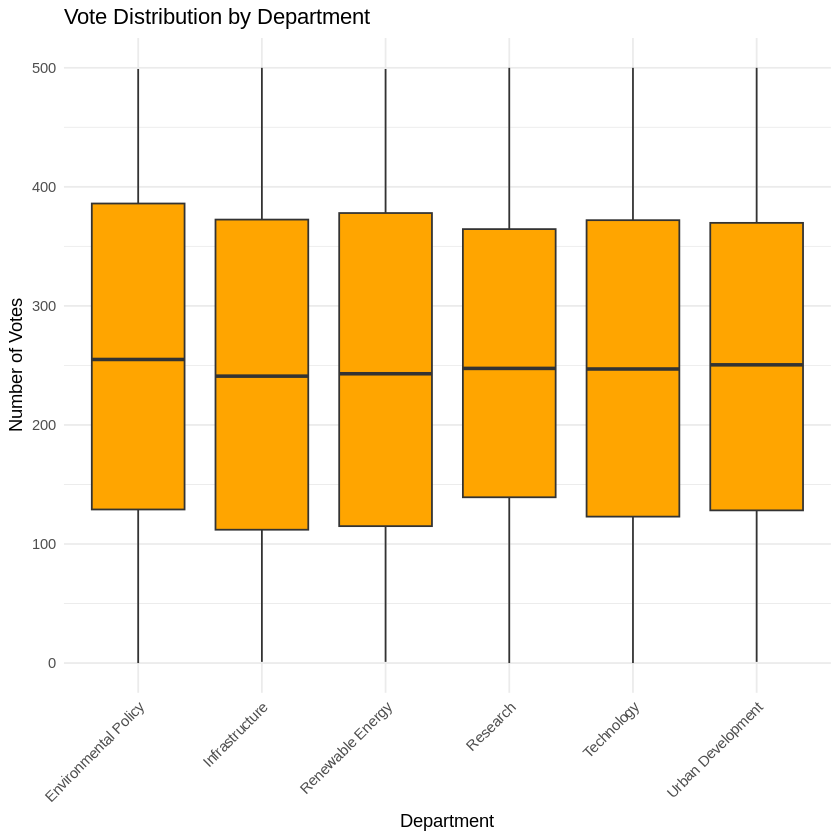

In [ ]:
ggplot(greenfuture, aes(x = `Department`, y = `Number of Votes`)) +
  geom_boxplot(fill = "orange") +
  theme_minimal() +
  labs(title = "Vote Distribution by Department",
       x = "Department",
       y = "Number of Votes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

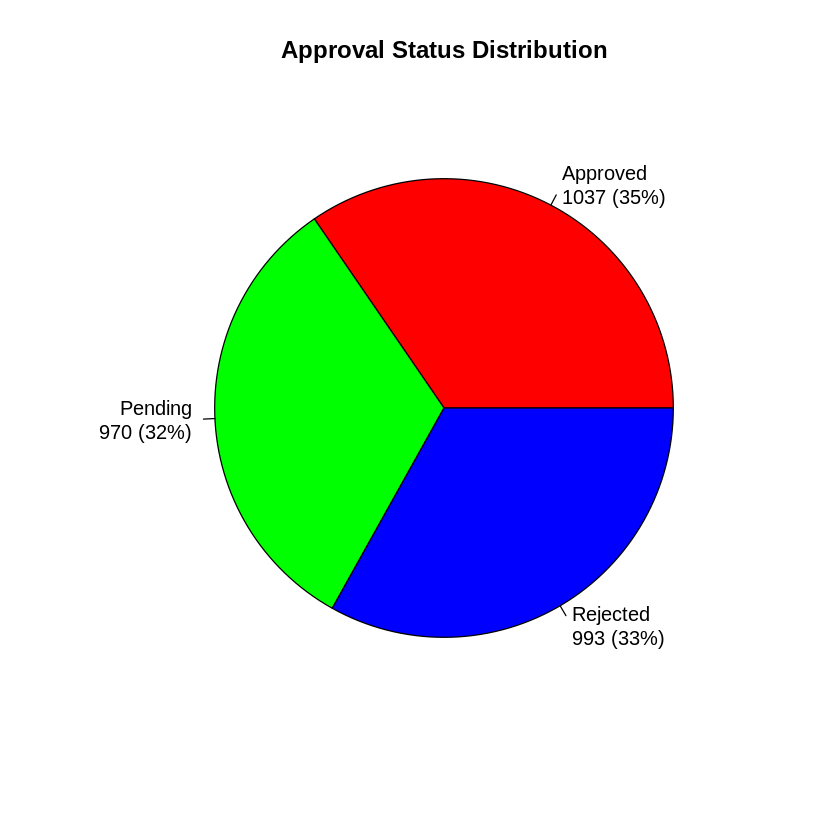

In [ ]:
approval_counts <- table(greenfuture$`Approval Status`)

pie(approval_counts,
    main = "Approval Status Distribution",
    col = rainbow(length(approval_counts)),
    labels = paste0(
        names(approval_counts), "\n",
        approval_counts, " (",
        round(100 * approval_counts/sum(approval_counts)), "%)"
    )
)


Section 2

In [ ]:
#Imported bookstore_transactions.csv to out python file

import pandas as pd
import numpy as np

# Loading the dataset
url = "https://raw.githubusercontent.com/Arrya1424/Databases-analytics-coursework/refs/heads/main/bookstore_transactions.csv"
bookstore = pd.read_csv(url)

# Display information
print("Dataset shape:", bookstore.shape)
print("\nFirst 5 rows:")
display(bookstore.head())

Dataset shape: (3500, 14)

First 5 rows:


,Transaction ID,Customer ID,Book Title,Author,Genre,Purchase Method,Payment Method,Stock Before,Stock After,Loyalty Points,Promotion Applied,Discount Applied,Order Status,Restock Triggered
0,59b278fe,914e0b,1984,George Orwell,Dystopian,Online,Cash,25,22,30,"Buy 3 Books, Get 1 Free",0,Completed,No
1,8f90d6f6,c8d80d,Becoming,Michelle Obama,Biography,Online,Online Payment,14,12,20,"Buy 3 Books, Get 1 Free",0,Completed,No
2,a116662e,dba9d8,The Midnight Library,Matt Haig,Fantasy,Online,Cash,21,18,30,"Buy 3 Books, Get 1 Free",0,Completed,No
3,2db9cc65,7cdf6c,Dune,Frank Herbert,Sci-Fi,Online,Cash,26,24,20,Flat 50% Discount,50,Completed,No
4,d99cc2d4,eb00af,Dune,Frank Herbert,Sci-Fi,Online,Card,6,5,10,"Buy One, Get One Free",0,Completed,No


In [ ]:
#performing data integrity checks

# Checking for missing values
print("\nMissing values per column:")
print(bookstore.isnull().sum())

# Checking for duplicates
print("\nNumber of duplicate rows:", bookstore.duplicated().sum())

# Verifying data types
print("\nData types:")
print(bookstore.dtypes)


Missing values per column:
Transaction ID          0
Customer ID             0
Book Title              0
Author                  0
Genre                   0
Purchase Method         0
Payment Method          0
Stock Before            0
Stock After             0
Loyalty Points          0
Promotion Applied    1575
Discount Applied        0
Order Status            0
Restock Triggered       0
dtype: int64

Number of duplicate rows: 0

Data types:
Transaction ID       object
Customer ID          object
Book Title           object
Author               object
Genre                object
Purchase Method      object
Payment Method       object
Stock Before          int64
Stock After           int64
Loyalty Points        int64
Promotion Applied    object
Discount Applied      int64
Order Status         object
Restock Triggered    object
dtype: object


In [ ]:
#analyzing data with numpy

# Strategy for handling missing data
print("\nHandling missing data:")

# For numerical columns, fill with median
num_cols = bookstore.select_dtypes(include=np.number).columns
bookstore[num_cols] = bookstore[num_cols].fillna(bookstore[num_cols].median())

# For categorical columns, fill with mode
cat_cols = bookstore.select_dtypes(exclude=np.number).columns
bookstore[cat_cols] = bookstore[cat_cols].fillna(bookstore[cat_cols].mode().iloc[0])

# Verify no missing values remain
print("Missing values after treatment:", bookstore.isnull().sum().sum())




Handling missing data:
Missing values after treatment: 0


In [ ]:
#Statistical Analysis
# Numerical columns analysis
numeric_cols = ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']
stats = pd.DataFrame({
    'mean': bookstore[numeric_cols].mean(),
    'median': bookstore[numeric_cols].median(),
    'std': bookstore[numeric_cols].std(),
    'min': bookstore[numeric_cols].min(),
    'max': bookstore[numeric_cols].max(),
    '25%': bookstore[numeric_cols].quantile(0.25),
    '75%': bookstore[numeric_cols].quantile(0.75)
})

print("\nDetailed statistics:")
display(stats)

# Key insights
print("\nKey Insights:")
print(f"- Average loyalty points earned: {round(stats.loc['Loyalty Points', 'mean'], 1)} points")
print(f"- Typical discount applied: {round(stats.loc['Discount Applied', 'median'], 2)}%")
print(f"- Maximum stock change observed: {stats.loc['Stock Before', 'max'] - stats.loc['Stock After', 'min']} units")


Detailed statistics:


,mean,median,std,min,max,25%,75%
Stock Before,27.763143,28.0,13.149466,5,50,16.0,39.0
Stock After,25.770571,26.0,13.169317,2,49,14.0,37.0
Loyalty Points,13.631429,10.0,11.380109,0,30,0.0,20.0
Discount Applied,6.614286,0.0,16.942477,0,50,0.0,0.0



Key Insights:
- Average loyalty points earned: 13.6 points
- Typical discount applied: 0.0%
- Maximum stock change observed: 48 units


In [ ]:
#Payment Method Analysis
payment_stats = bookstore.groupby('Payment Method').agg({
    'Loyalty Points': 'mean',
    'Discount Applied': 'mean',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Transaction Count'})

print("\nPayment Method Analysis:")
display(payment_stats.sort_values('Transaction Count', ascending=False))


Payment Method Analysis:


,Loyalty Points,Discount Applied,Transaction Count
Payment Method,,,
Cash,12.967687,6.420068,1176
Online Payment,13.926117,6.486254,1164
Card,14.008621,6.939655,1160


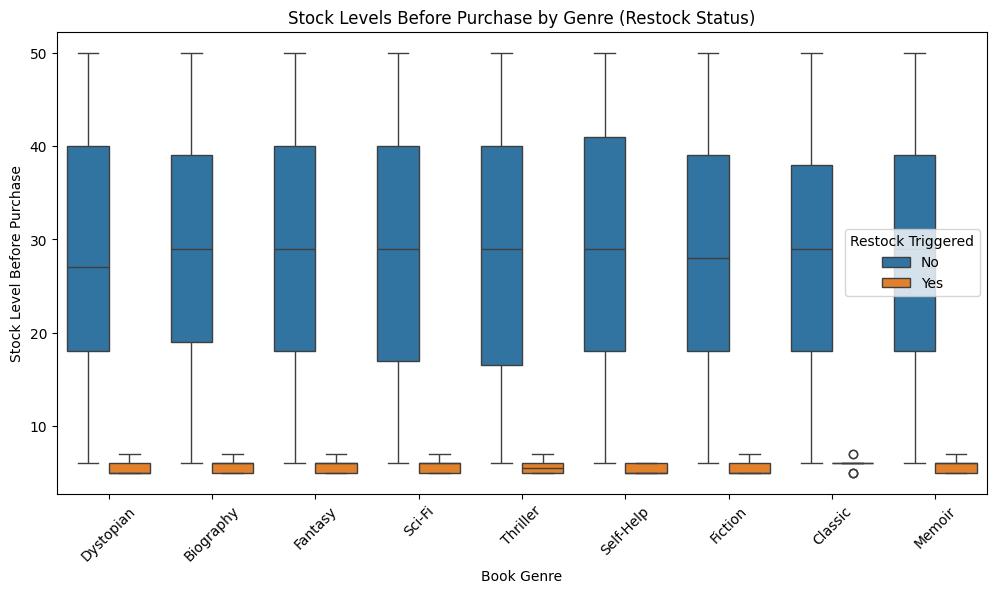

In [ ]:
#Visualization Plot 1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=bookstore, x='Genre', y='Stock Before', hue='Restock Triggered')
plt.title('Stock Levels Before Purchase by Genre (Restock Status)')
plt.ylabel('Stock Level Before Purchase')
plt.xlabel('Book Genre')
plt.xticks(rotation=45)
plt.legend(title='Restock Triggered')
plt.show()

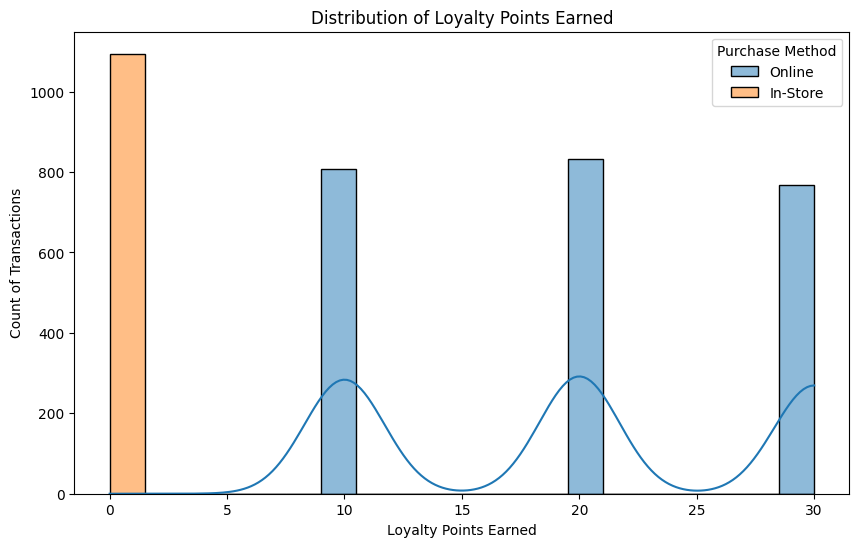

In [ ]:
#Visualization Plot 2
plt.figure(figsize=(10, 6))
sns.histplot(data=bookstore, x='Loyalty Points', bins=20, kde=True, hue='Purchase Method')
plt.title('Distribution of Loyalty Points Earned')
plt.xlabel('Loyalty Points Earned')
plt.ylabel('Count of Transactions')
plt.show()

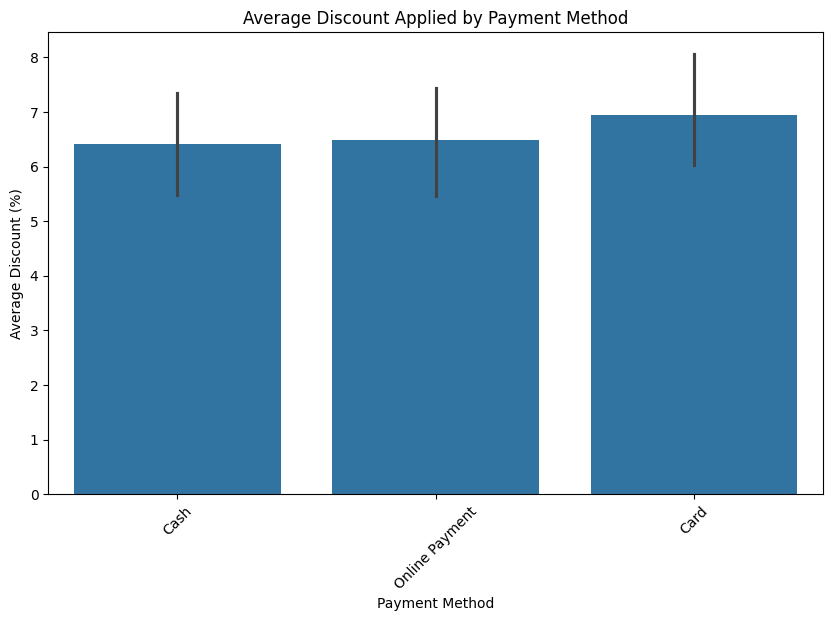

In [ ]:
#Visualization Plot 3
plt.figure(figsize=(10, 6))
sns.barplot(data=bookstore, x='Payment Method', y='Discount Applied', estimator=np.mean)
plt.title('Average Discount Applied by Payment Method')
plt.ylabel('Average Discount (%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Additional Business Insights
# Restock analysis
restock_stats = bookstore.groupby('Genre').agg({
    'Restock Triggered': lambda x: (x == 'Yes').mean(),
    'Stock Before': 'median'
}).sort_values('Restock Triggered', ascending=False)

print("\nRestock Probability by Genre:")
display(restock_stats)

# Promotion effectiveness
if 'Promotion Applied' in bookstore.columns:
    promo_stats = bookstore.groupby('Promotion Applied').agg({
        'Discount Applied': 'mean',
        'Loyalty Points': 'mean',
        'Transaction ID': 'count'
    }).rename(columns={'Transaction ID': 'Transaction Count'})

    print("\nPromotion Effectiveness Analysis:")
    display(promo_stats)


Restock Probability by Genre:


,Restock Triggered,Stock Before
Genre,,
Dystopian,0.050296,26.0
Memoir,0.044248,27.0
Classic,0.039886,29.0
Thriller,0.039660,28.0
Fantasy,0.037868,28.0
Biography,0.037143,29.0
Sci-Fi,0.036723,28.0
Fiction,0.030675,28.0
Self-Help,0.029255,28.0



Promotion Effectiveness Analysis:


,Discount Applied,Loyalty Points,Transaction Count
Promotion Applied,,,
"Buy 3 Books, Get 1 Free",0.0,19.567901,486
"Buy One, Get One Free",0.0,19.136842,475
Earn 2x Reward Points,0.0,9.503854,2076
Flat 50% Discount,50.0,20.259179,463


Section 3

Implement MongoDB Atlas Data Insertion:
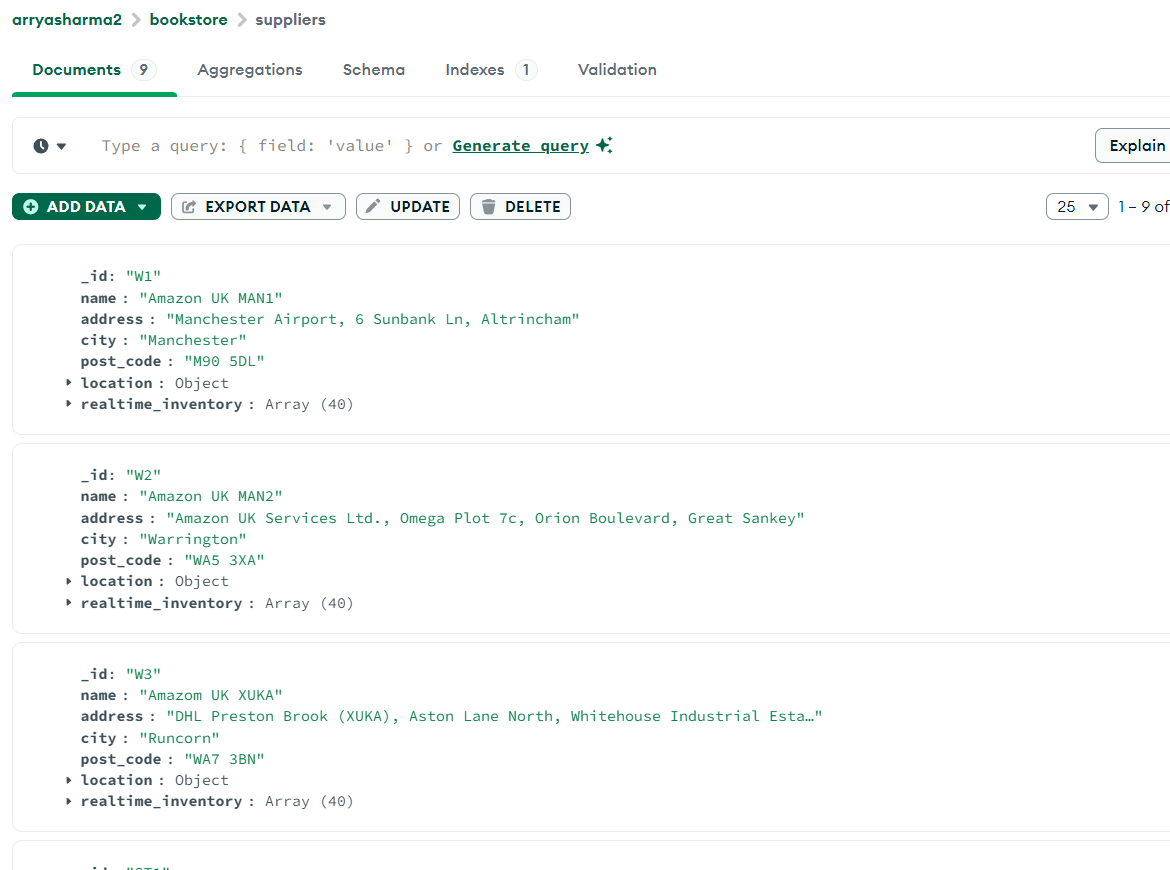

Here we have inserted data in our mongodb collection



Designing a NOSQL schema:

Suppliers:

[{
  "_id": "W1",
  "name": "Amazon UK MAN1",
  "address": "Manchester Airport, 6 Sunbank Ln, Altrincham",
  "city": "Manchester",
  "post_code": "M90 5DL",
  "location": {
    "type": "Point",
    "coordinates": [
      53.36275842,
      -2.294618987
    ]
]

Rating:

[{
  "_id": "RA1",
  "order_date": {
    "$date": {
      "$numberLong": "1664664251000"
]

Products:

[{
  "_id": "CD2",
  "name": "Led Zepellin IV",
  "short_desc": "The informal setting at Headley Grange inspired the band, allowing them to try different arrangements of material and create songs in various styles",
  "dimensions": {
    "length": 12,
    "width": 12,
    "height": 1
  }
]

Past Orders:

[{
  "_id": "20221001050939C4",
  "order_date": {
    "$date": {
      "$numberLong": "1664600940000"
    }
]

personal old:

[{
  "_id": "PA1",
  "name": "Mike Dean",
  "age": 20,
  "gender": "M",
  "phone": "07618259974",
  "email": "mike.dean@gmail.com",
  "bank_account": {
    "account_name": "Mike Dean",
    "account_number": 90375644,
    "sort_code": "040066"
  }
]

Partners:

[{
  "_id": "PA1",
  "name": "Mike Dean",
  "age": 20,
  "gender": "M",
  "phone": "07618259974",
  "email": "mike.dean@gmail.com",
  "bank_account": {
    "account_name": "Mike Dean",
    "account_number": 90375644,
    "sort_code": "040066"
  }

Partner History:

[{
  "_id": {
    "$oid": "63b852b6a7fc6363d52e5cbe"
  },
  "partner_id": "PA1",
  "start_date": {
    "$date": {
      "$numberLong": "1672617600000"
    }
  },
  "end_date": {
    "$date": {
      "$numberLong": "1672703999000"
    }
  },
  "orders": [
    {
      "order_id": "20230102100909C1",
      "timestamp": {
        "$date": {
          "$numberLong": "1672654149000"
        }
      },
      "order_details": [
        {
          "product_id": "FP1",
          "quantity": 1
        },
        {
          "product_id": "FP2",
          "quantity": 2
        }
      ]
    },
    {
      "order_id": "20230102220059C20",
      "timestamp": {
        "$date": {
          "$numberLong": "1672696859000"
        }
      },
      "order_details": {
        "product_id": "FP15",
        "quantity": 3
      }
    }
  ]
]

Daily Inventory Record:

[{
  "_id": {
    "supplier_id": "W2",
    "product_id": "HA2",
    "start_date": "02/01/2023 00:00",
    "end_date": "02/01/2023 23:59"
  },
  "supplier_location": {
    "longitude": "53.4206283",
    "latitude": "-2.6594717"
  },
  "inventory_data": [
    {
      "datetime": {
        "$date": {
          "$numberLong": "1675271640000"
        }
      },
      "inventory_quantity": "8"
    }
  ]
}
]

Customers:

[{
  "_id": "C1",
  "Customer": "Gunner Ferrell",
  "Gender": "M",
  "Age": 51,
  "phone_number": {
    "$numberLong": "443454155475"
  },
  "addresses": [
    {
      "_id": "AD1",
      "house": 27,
      "street": "Ellesmere St",
      "city": "Manchester",
      "post_code": "M15 4RU",
      "location": {
        "type": "Point",
        "coordinates": [
          53.4702888668,
          -2.26459207339
        ]
      }
    }
  ],
  "current_orders": [
    {
      "_id": "20230104002920C1",
      "date": {
        "$date": {
          "$numberLong": "1672792160000"
        }
      },
      "order_status": 3,
      "total_cost": 10.7,
      "partner_id": "",
      "shipping_id": "AD1",
      "supplier_id": "ST1",
      "order_details": [
        {
          "product_id": "FP1",
          "quantity": 4,
          "cost": 2
        },
        {
          "product_id": "FP2",
          "quantity": 1,
          "cost": 2.7
        }
      ]
    },
    {
      "_id": "20230104032330C1",
      "date": {
        "$date": {
          "$numberLong": "1672802610000"
        }
      },
      "order_status": 3,
      "total_cost": 4,
      "partner_id": "",
      "shipping_id": "AD1",
      "supplier_id": "ST2",
      "order_details": [
        {
          "product_id": "FP5",
          "quantity": 2,
          "cost": 2
        }
      ]
    },
    {
      "_id": "20230109181700C2",
      "date": {
        "$date": {
          "$numberLong": "1673285460000"
        }
      },
      "order_status": 3,
      "total_cost": 6,
      "partner_id": "PA2",
      "shipping_id": "AD2",
      "supplier_id": "ST3",
      "order_details": [
        {
          "product_id": "FP3",
          "quantity": 3,
          "cost": 6
        }
      ]
    },
    {
      "_id": "20233101/09/23173100C1",
      "date": {
        "$date": {
          "$numberLong": "1673285460000"
        }
      },
      "order_status": 3,
      "total_cost": 6,
      "partner_id": "PA2",
      "shipping_id": "AD1",
      "supplier_id": "ST5",
      "order_details": [
        {
          "product_id": "FP1"
        }
      ]
    }
  ],
  "recommended_products": [
    {
      "product_id": "FP10",
      "avg_rating": 3.8
    },
    {
      "product_id": "CD2",
      "ratings": 4
    }
  ]
}

nosql_schema_diagram.svg

You can find, insert, update and delete data using the query tab present inside the collection.

For example:

Find all products with price less than £20, insert the query
{ { "std_price": { "$lt": 20 } }
and press find
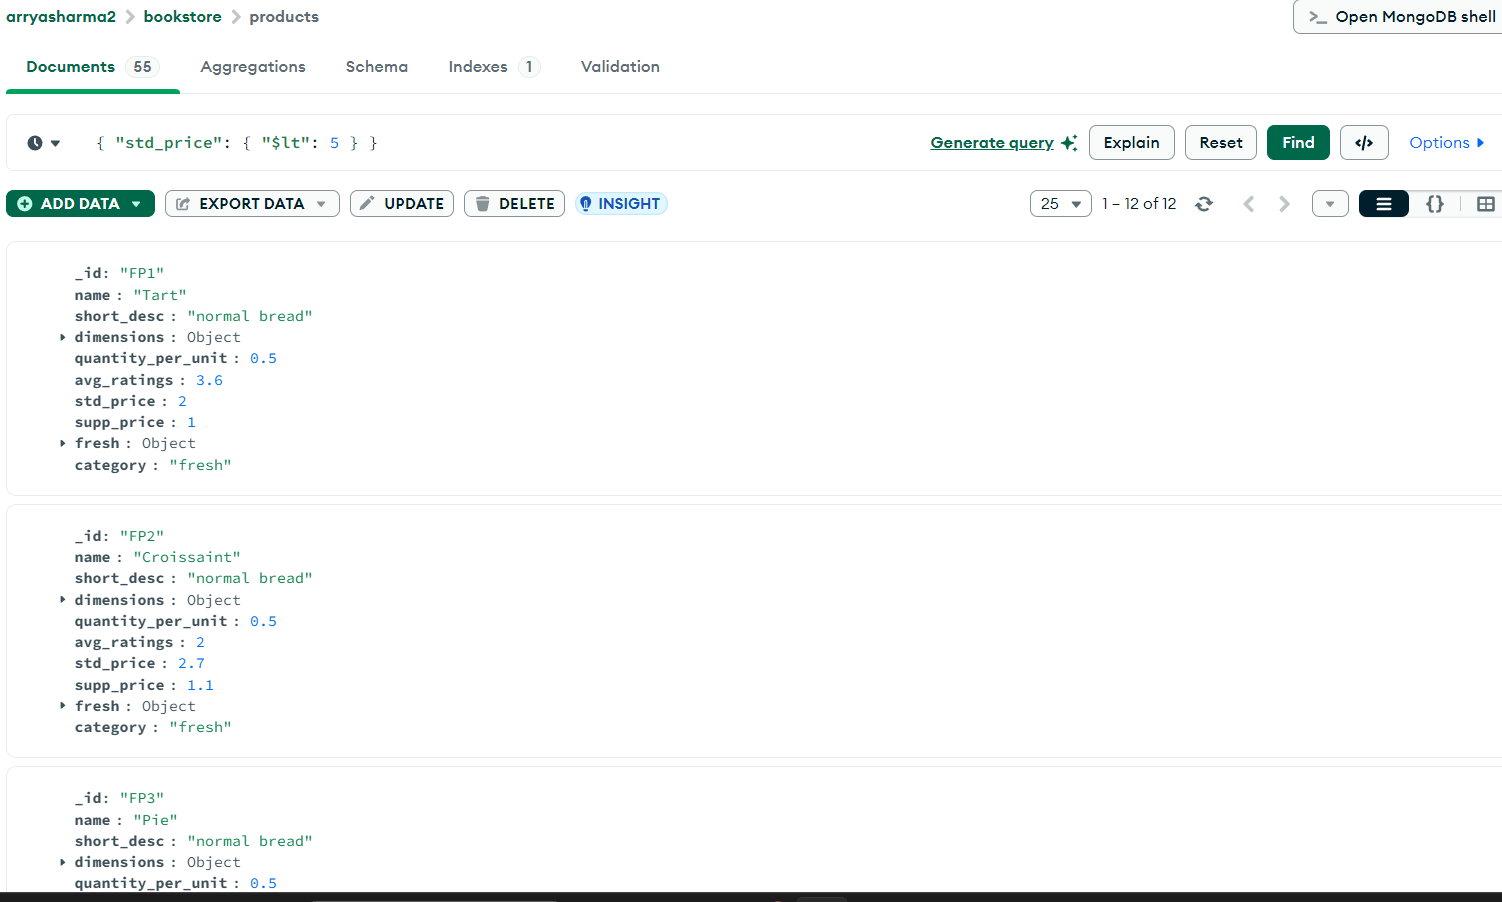


On the other hand, to Insert a new product, click on add -> Insert Document :
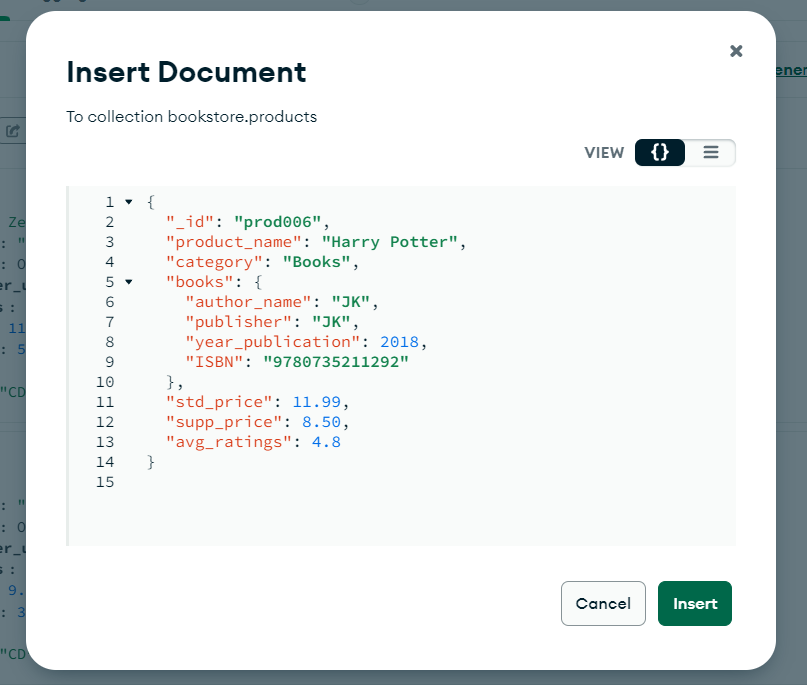

TO Delete a product, press delete beside the particular record to delete:
 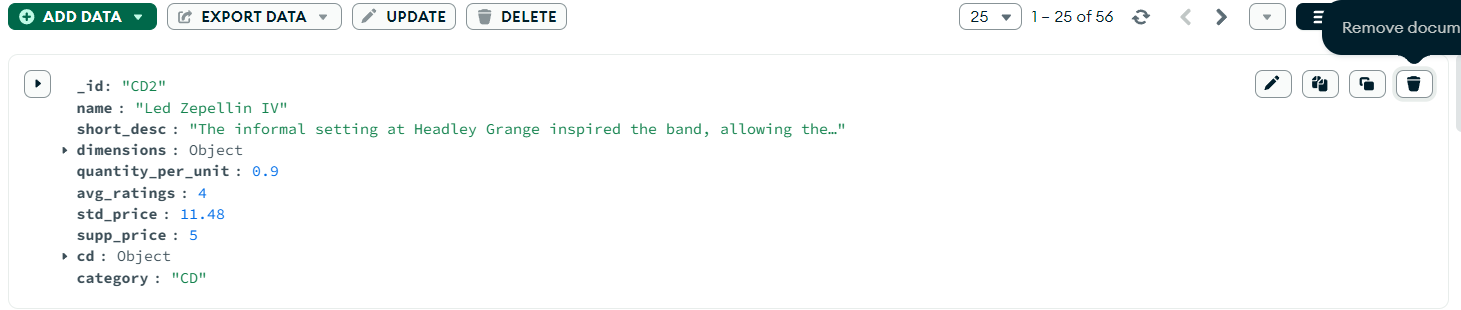

 To retrieve data, use query like
 Filter: {}
 { "name": 1, "phone": 1, "_id": 0 }
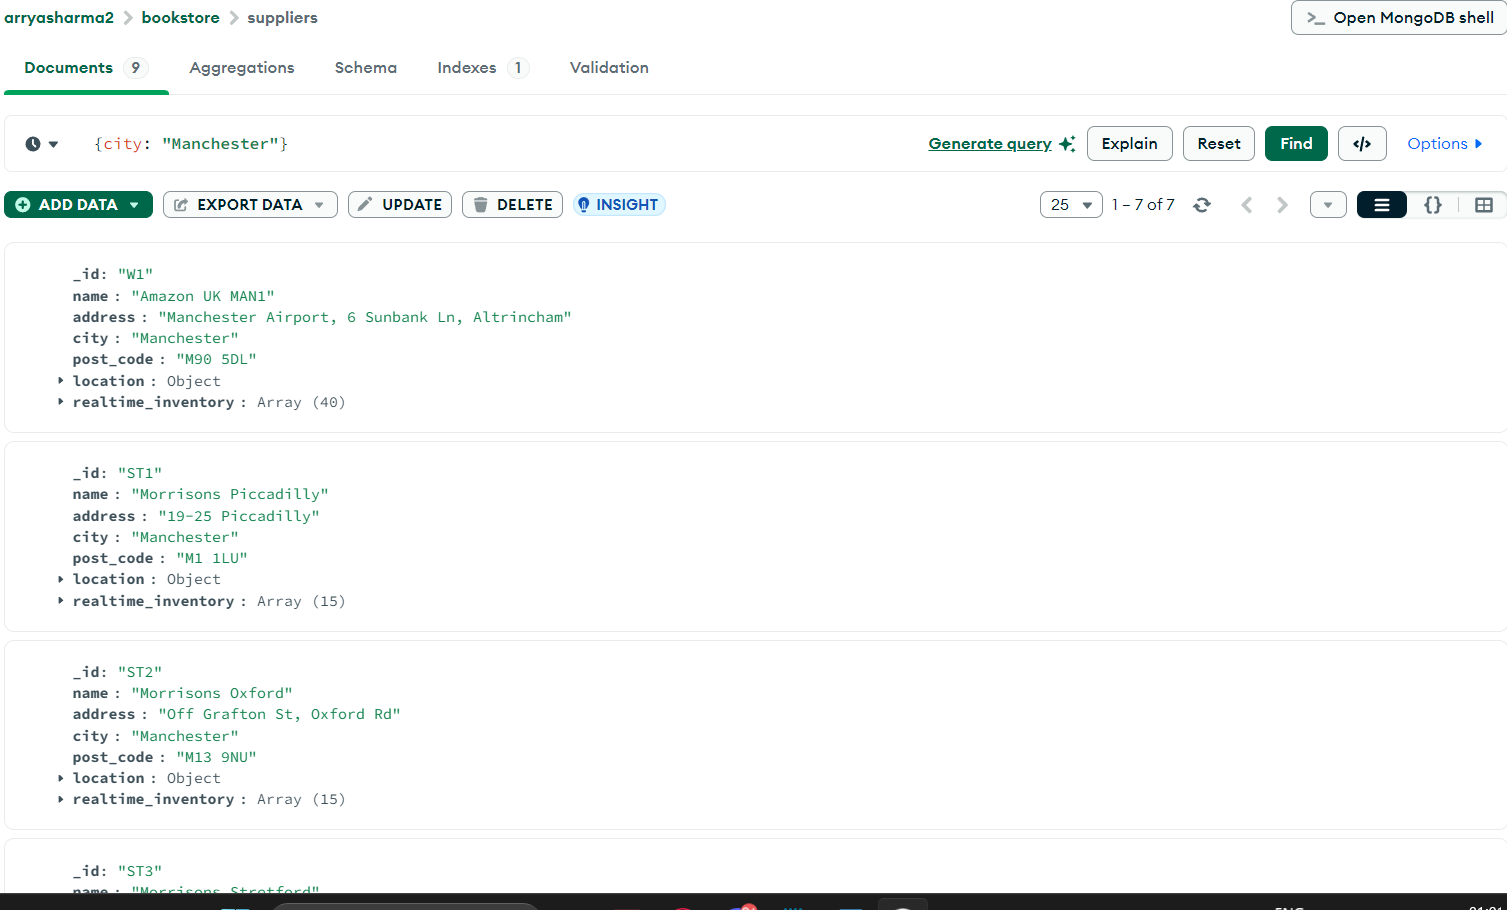

And lastly, to update data:

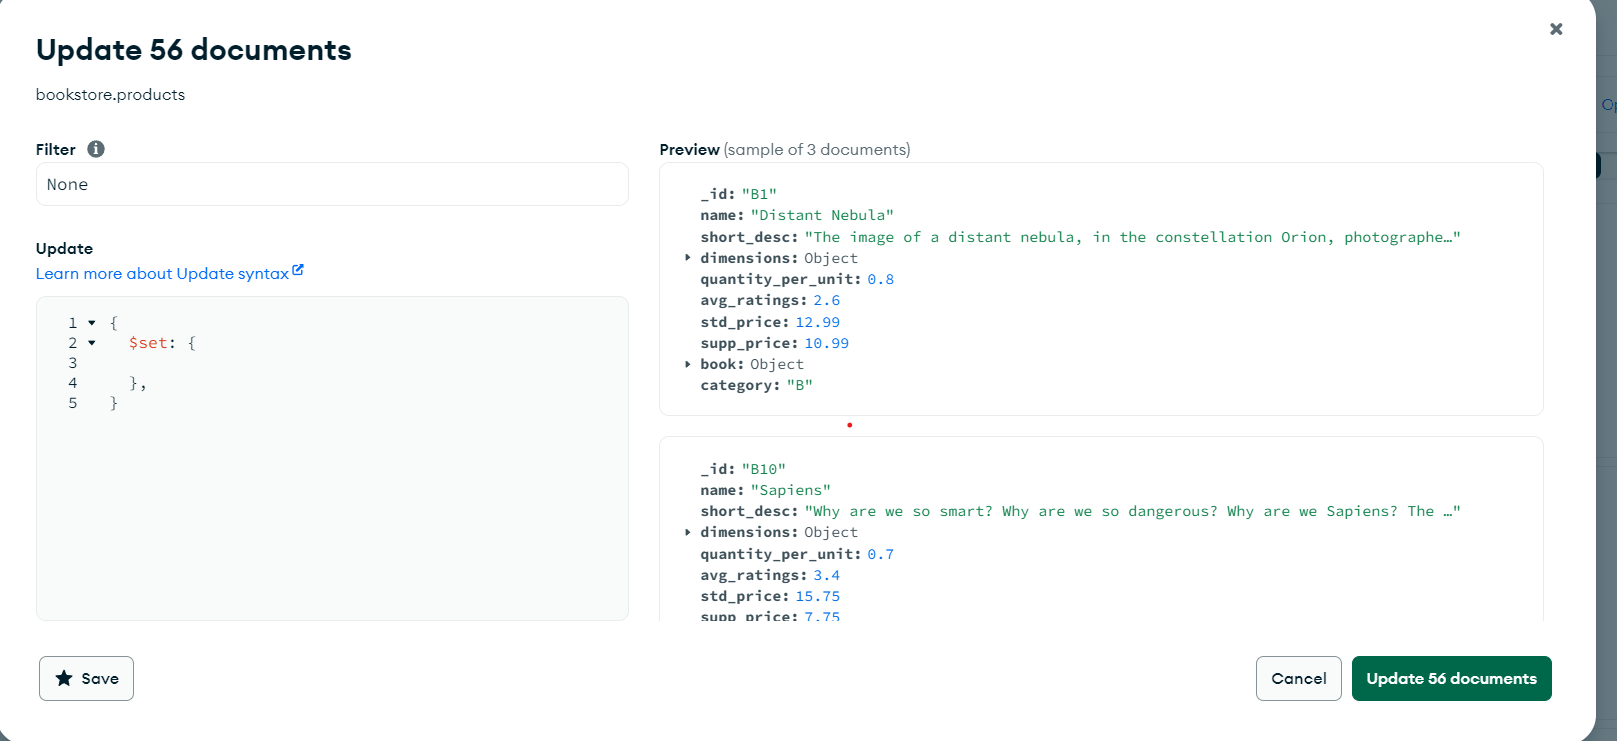

When analyzing data, I often look for relationships between numerical features. One of the most effective ways to explore these relationships is by creating visualizations such as pairwise scatter plots, correlation heatmaps, and individual scatter plots.

I typically begin by importing the dataset into a Pandas DataFrame and then filtering out the numerical columns using select_dtypes. This helps me focus only on the fields that can be quantitatively compared.

To visualize these relationships, I use libraries like Seaborn and Matplotlib. The pair plot is particularly useful because it shows all pairwise scatter plots along with distributions on the diagonal. A correlation heatmap gives me a quick overview of how strongly features are related, while scatter plots help me deeply understand the relationship between two specific variables.

These plots help me detect trends, correlations, and potential outliers in the data, making them an essential part of my exploratory data analysis process.

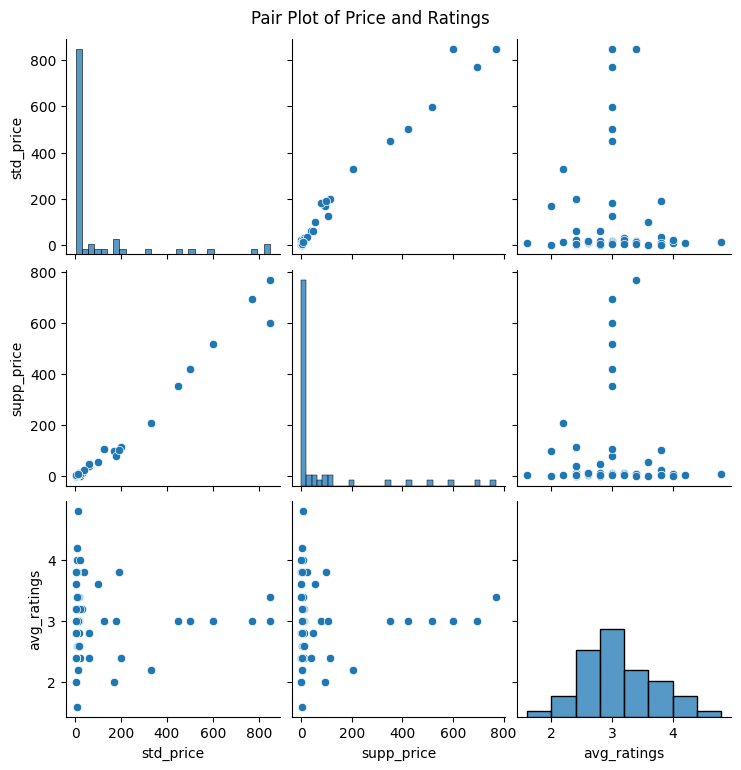

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("bookstore.products2.csv")

# Select a few key numerical columns
subset = df[["std_price", "supp_price", "avg_ratings"]]  # Replace with actual columns

# Create pair plot
sns.pairplot(subset)
plt.suptitle("Pair Plot of Price and Ratings", y=1.02)
plt.show()
